In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate, UnitaryGate
import numpy as np

SYGate = UnitaryGate(YGate().power(1/2), label=r"$\sqrt{Y}$")
SYdgGate = UnitaryGate(SYGate.inverse(), label=r"$\sqrt{Y}^\dag$")

def generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, num_cl_bits,trotter_barriers = False, layer_barriers = False):
    if num_cl_bits == 0:
        qc = QuantumCircuit(num_qubits)
    else:
        qc = QuantumCircuit(num_qubits, num_cl_bits)

    for trotter_step in range(num_trotter_steps):
        add_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers)
        if trotter_barriers:
            qc.barrier()
    return qc

def add_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers):
    for i in range(0, qc.num_qubits-1, 2):
        qc.sdg([i, i + 1])
        qc.append(SYGate, [i + 1])
        qc.cx(i, i + 1)
        qc.append(SYdgGate, [i + 1])
    if layer_barriers:
        qc.barrier()
    for i in range(1, qc.num_qubits-1, 2):
        qc.sdg([i, i + 1])
        qc.append(SYGate, [i + 1])
        qc.cx(i, i + 1)
        qc.append(SYdgGate, [i + 1])
    if layer_barriers:
        qc.barrier()
    qc.rx(rx_angle, list(range(qc.num_qubits)))
    if layer_barriers:
        qc.barrier()

In [4]:
num_qubits = 6
num_trotter_steps = 1
rx_angle = (0.5 * np.pi)
num_cl_bits = 0

qc = generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, num_cl_bits,trotter_barriers= True, layer_barriers= True)
qc.draw(output='text')

┌─────┐                                       ░                           »
q_0: ┤ Sdg ├────────────────■──────────────────────░───────────────────────────»
     ├─────┤┌────────────┐┌─┴─┐┌─────────────────┐ ░ ┌─────┐                   »
q_1: ┤ Sdg ├┤ $\sqrt{Y}$ ├┤ X ├┤ $\sqrt{Y}^\dag$ ├─░─┤ Sdg ├────────────────■──»
     ├─────┤└────────────┘└───┘└─────────────────┘ ░ ├─────┤┌────────────┐┌─┴─┐»
q_2: ┤ Sdg ├────────────────■──────────────────────░─┤ Sdg ├┤ $\sqrt{Y}$ ├┤ X ├»
     ├─────┤┌────────────┐┌─┴─┐┌─────────────────┐ ░ ├─────┤└────────────┘└───┘»
q_3: ┤ Sdg ├┤ $\sqrt{Y}$ ├┤ X ├┤ $\sqrt{Y}^\dag$ ├─░─┤ Sdg ├────────────────■──»
     ├─────┤└────────────┘└───┘└─────────────────┘ ░ ├─────┤┌────────────┐┌─┴─┐»
q_4: ┤ Sdg ├────────────────■──────────────────────░─┤ Sdg ├┤ $\sqrt{Y}$ ├┤ X ├»
     ├─────┤┌────────────┐┌─┴─┐┌─────────────────┐ ░ └─────┘└────────────┘└───┘»
q_5: ┤ Sdg ├┤ $\sqrt{Y}$ ├┤ X ├┤ $\sqrt{Y}^\dag$ ├─░───────────────────────────»
     └─────┘└────────────┘└───┘└─────────────────┘ ░                           »
«                         ░ ┌─────────┐ ░  ░ 
«q_0: ────────────────────░─┤ Rx(π/2) ├─░──░─
«                         ░ ├─────────┤ ░  ░ 
«q_1: ────────────────────░─┤ Rx(π/2) ├─░──░─
«     ┌─────────────────┐ ░ ├─────────┤ ░  ░ 
«q_2: ┤ $\sqrt{Y}^\dag$ ├─░─┤ Rx(π/2) ├─░──░─
«     └─────────────────┘ ░ ├─────────┤ ░  ░ 
«q_3: ────────────────────░─┤ Rx(π/2) ├─░──░─
«     ┌─────────────────┐ ░ ├─────────┤ ░  ░ 
«q_4: ┤ $\sqrt{Y}^\dag$ ├─░─┤ Rx(π/2) ├─░──░─
«     └─────────────────┘ ░ ├─────────┤ ░  ░ 
«q_5: ────────────────────░─┤ Rx(π/2) ├─░──░─
«                         ░ └─────────┘ ░  ░

In [5]:
def append_mirrored_1d_tfim_circuit(qc, num_qubits, num_trotter_steps, rx_angle, trotter_barriers = False, layer_barriers = False):
    for trotter_step in range(num_trotter_steps):
        add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers)
        if trotter_barriers:
            qc.barrier()

def add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers):
    qc.rx(-rx_angle, list(range(qc.num_qubits)))
    if layer_barriers:
        qc.barrier()
    for i in range(1, qc.num_qubits-1, 2):
        qc.append(SYGate, [i + 1])
        qc.cx(i, i + 1)
        qc.append(SYdgGate, [i + 1])
        qc.s([i, i + 1])
        if layer_barriers:
            qc.barrier()
    for i in range(0, qc.num_qubits-1, 2):
        qc.append(SYGate, [i + 1])
        qc.cx(i, i + 1)
        qc.append(SYdgGate, [i + 1])
        qc.s([i, i + 1])
        if layer_barriers:
            qc.barrier()    

In [6]:
append_mirrored_1d_tfim_circuit(qc, num_qubits, num_trotter_steps, rx_angle, trotter_barriers = True, layer_barriers = True)
qc.draw(output="text")

┌─────┐                                       ░                           »
q_0: ┤ Sdg ├────────────────■──────────────────────░───────────────────────────»
     ├─────┤┌────────────┐┌─┴─┐┌─────────────────┐ ░ ┌─────┐                   »
q_1: ┤ Sdg ├┤ $\sqrt{Y}$ ├┤ X ├┤ $\sqrt{Y}^\dag$ ├─░─┤ Sdg ├────────────────■──»
     ├─────┤└────────────┘└───┘└─────────────────┘ ░ ├─────┤┌────────────┐┌─┴─┐»
q_2: ┤ Sdg ├────────────────■──────────────────────░─┤ Sdg ├┤ $\sqrt{Y}$ ├┤ X ├»
     ├─────┤┌────────────┐┌─┴─┐┌─────────────────┐ ░ ├─────┤└────────────┘└───┘»
q_3: ┤ Sdg ├┤ $\sqrt{Y}$ ├┤ X ├┤ $\sqrt{Y}^\dag$ ├─░─┤ Sdg ├────────────────■──»
     ├─────┤└────────────┘└───┘└─────────────────┘ ░ ├─────┤┌────────────┐┌─┴─┐»
q_4: ┤ Sdg ├────────────────■──────────────────────░─┤ Sdg ├┤ $\sqrt{Y}$ ├┤ X ├»
     ├─────┤┌────────────┐┌─┴─┐┌─────────────────┐ ░ └─────┘└────────────┘└───┘»
q_5: ┤ Sdg ├┤ $\sqrt{Y}$ ├┤ X ├┤ $\sqrt{Y}^\dag$ ├─░───────────────────────────»
     └─────┘└────────────┘└───┘└─────────────────┘ ░                           »
«                         ░ ┌─────────┐ ░  ░ ┌──────────┐ ░                    »
«q_0: ────────────────────░─┤ Rx(π/2) ├─░──░─┤ Rx(-π/2) ├─░────────────────────»
«                         ░ ├─────────┤ ░  ░ ├──────────┤ ░                    »
«q_1: ────────────────────░─┤ Rx(π/2) ├─░──░─┤ Rx(-π/2) ├─░─────────────────■──»
«     ┌─────────────────┐ ░ ├─────────┤ ░  ░ ├──────────┤ ░ ┌────────────┐┌─┴─┐»
«q_2: ┤ $\sqrt{Y}^\dag$ ├─░─┤ Rx(π/2) ├─░──░─┤ Rx(-π/2) ├─░─┤ $\sqrt{Y}$ ├┤ X ├»
«     └─────────────────┘ ░ ├─────────┤ ░  ░ ├──────────┤ ░ └────────────┘└───┘»
«q_3: ────────────────────░─┤ Rx(π/2) ├─░──░─┤ Rx(-π/2) ├─░────────────────────»
«     ┌─────────────────┐ ░ ├─────────┤ ░  ░ ├──────────┤ ░                    »
«q_4: ┤ $\sqrt{Y}^\dag$ ├─░─┤ Rx(π/2) ├─░──░─┤ Rx(-π/2) ├─░────────────────────»
«     └─────────────────┘ ░ ├─────────┤ ░  ░ ├──────────┤ ░                    »
«q_5: ────────────────────░─┤ Rx(π/2) ├─░──░─┤ Rx(-π/2) ├─░────────────────────»
«                         ░ └─────────┘ ░  ░ └──────────┘ ░                    »
«                              ░                                             ░ »
«q_0: ─────────────────────────░─────────────────────────────────────────────░─»
«            ┌───┐             ░                                             ░ »
«q_1: ───────┤ S ├─────────────░─────────────────────────────────────────────░─»
«     ┌──────┴───┴──────┐┌───┐ ░                                             ░ »
«q_2: ┤ $\sqrt{Y}^\dag$ ├┤ S ├─░─────────────────────────────────────────────░─»
«     └─────────────────┘└───┘ ░                           ┌───┐             ░ »
«q_3: ─────────────────────────░─────────────────■─────────┤ S ├─────────────░─»
«                              ░ ┌────────────┐┌─┴─┐┌──────┴───┴──────┐┌───┐ ░ »
«q_4: ─────────────────────────░─┤ $\sqrt{Y}$ ├┤ X ├┤ $\sqrt{Y}^\dag$ ├┤ S ├─░─»
«                              ░ └────────────┘└───┘└─────────────────┘└───┘ ░ »
«q_5: ─────────────────────────░─────────────────────────────────────────────░─»
«                              ░                                             ░ »
«                               ┌───┐             ░                    »
«q_0: ────────────────■─────────┤ S ├─────────────░────────────────────»
«     ┌────────────┐┌─┴─┐┌──────┴───┴──────┐┌───┐ ░                    »
«q_1: ┤ $\sqrt{Y}$ ├┤ X ├┤ $\sqrt{Y}^\dag$ ├┤ S ├─░────────────────────»
«     └────────────┘└───┘└─────────────────┘└───┘ ░                    »
«q_2: ────────────────────────────────────────────░─────────────────■──»
«                                                 ░ ┌────────────┐┌─┴─┐»
«q_3: ────────────────────────────────────────────░─┤ $\sqrt{Y}$ ├┤ X ├»
«                                                 ░ └────────────┘└───┘»
«q_4: ────────────────────────────────────────────░────────────────────»
«                                                 ░                    »
«q_5: ─────────────────────────────────────

In [7]:
max_trotter_steps = 10
num_qubits = 100
measured_qubits = [49, 50]

qc_list = []

for trotter_step in range(max_trotter_steps):
    qc = generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, num_cl_bits=len(measured_qubits),trotter_barriers= True, layer_barriers= True)
    append_mirrored_1d_tfim_circuit(qc, num_qubits, num_trotter_steps, rx_angle, trotter_barriers = True, layer_barriers = True)
    qc.measure(measured_qubits, list(range(len(measured_qubits))))
    qc_list.append(qc)



In [7]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService

backend_name = "ibm_brisbane"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)
print("Done getting the backend")

qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

/tmp/ipykernel_213453/3071620673.py:6: DeprecationWarning: The get_backend() method is deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use backend() instead.
  backend = service.get_backend(backend_name)


Done getting the backend


In [8]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

job = sampler.run(qc_transpiled_list)
print(job.job_id())

/tmp/ipykernel_213453/2065324435.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend)


csx0tchvkv50008hhh9g


In [14]:
job_id = "csx0hddjkdzg00898akg"
job = service.job(job_id)

survival_probability_list = []
for trotter_step in range(max_trotter_steps):
    try:
        data = job.result()[trotter_step].data
        survival_probability_list.append(data.c.get_counts()['0' * len(measured_qubits)] / data.c.num_shots)
    except:
        survival_probability_list.append(0)

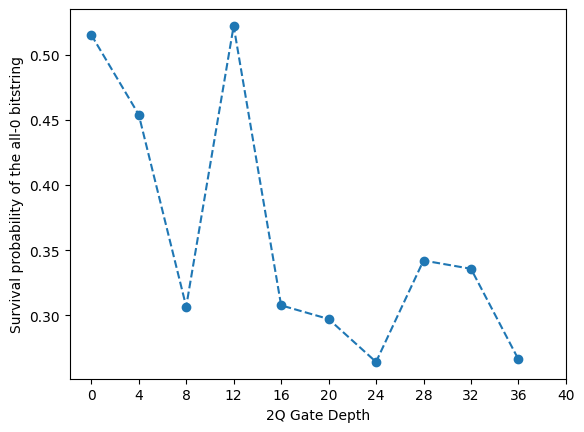

In [15]:
import matplotlib.pyplot as plt

plt.plot(list(range(0, 4* max_trotter_steps, 4)), survival_probability_list, '--o')
plt.xlabel('2Q Gate Depth')
plt.ylabel('Survival probability of the all-0 bitstring')
plt.xticks(np.arange(0, 44, 4))
plt.show()

In [11]:
from qiskit.circuit import Parameter
rx_angle = Parameter("rx_angle")
trotter_steps = 2
qc = generate_1d_tfim_circuit(num_qubits, trotter_steps, rx_angle,num_cl_bits=0)

from qiskit.quantum_info import SparsePauliOp

middle_index = (num_qubits // 2)
observable = SparsePauliOp("I" * middle_index + "Z" + "I" * (middle_index-1))

In [12]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService

backend_name = "ibm_brisbane"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)

qc_transpiled = transpile(qc, backend=backend, optimization_level=1)
observable = observable.apply_layout(qc_transpiled.layout)

/tmp/ipykernel_213566/2858228033.py:6: DeprecationWarning: The get_backend() method is deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use backend() instead.
  backend = service.get_backend(backend_name)


In [13]:
from qiskit_ibm_runtime import EstimatorV2, EstimatorOptions

min_rx_angle = 0
max_rx_angle = np.pi / 2
num_rx_angle = 12
rx_angle_list = np.linspace(min_rx_angle, max_rx_angle, num_rx_angle)

options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

estimator = EstimatorV2(backend=backend, options=options)

job = estimator.run([(qc_transpiled,observable, rx_angle_list)])
print(job.job_id())


/tmp/ipykernel_213566/3608788775.py:13: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  estimator = EstimatorV2(backend=backend, options=options)


csx1skpvkv50008hmjwg


In [18]:
job_id = "csx1skpvkv50008hmjwg"
job = service.job(job_id)

exp_val_list = job.result()[0].data.evs()

plt.plot(rx.angle_list / np.pi, exp_val_list, '--o')
plt.xlabel(r'Rx angle ($\pi$)')
plt.ylabel(r'$\langle Z \rangle in the middle of the chain')
plt.ylim(-0.1, 1.1)

TypeError: 'numpy.ndarray' object is not callable